In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/part-00000-9b8b5fff-8a6f-4b5d-b76f-202824892321-c000.csv")
df.head()

,Timestamp,Day_of_Week,Holiday_Indicator,Fleet_Size,Vehicle_Types,Average_Battery_Capacity_kWh,Number_of_Charging_Stations,Charging_Power_Rating_kW,Charging_Efficiency,Total_Distance_Driven_km,...,Electricity_Prices_USD,Grid_Demand_MW,Incentives_Programs,Charging_Preferences,EV_Usage_Patterns,Charging_Load_kW,Hour,DayOfWeek,Month,IsWeekend
0,2020-12-18T05:00:00.000+05:30,4,0,5.0,Light-Duty,150.0,3.0,7.2,0.875531,7.0,...,0.203290,91.061101,1,Night,Medium,14.0,5,6,12,0
1,2022-03-01T12:00:00.000+05:30,4,0,5.0,Light-Duty,50.0,1.0,22.5,0.761737,0.0,...,0.282706,102.042863,0,Night,High,21.0,12,3,3,0
2,2023-09-12T20:00:00.000+05:30,1,0,5.0,Heavy-Duty,50.0,4.0,50.0,0.813927,1.0,...,0.430902,108.767360,0,Day,High,0.0,20,3,9,0
3,2020-08-03T16:00:00.000+05:30,3,0,10.0,Light-Duty,150.0,2.0,22.5,0.816037,0.0,...,0.455454,87.720937,0,Day,Low,91.0,16,2,8,0
4,2024-05-22T08:00:00.000+05:30,2,0,5.0,Light-Duty,50.0,4.0,22.5,0.792259,0.0,...,0.118778,68.889408,0,Night,High,12.0,8,4,5,0


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows or fill if required
df.dropna(inplace=True)  # or df.fillna(0)

Timestamp                        0
Day_of_Week                      0
Holiday_Indicator                0
Fleet_Size                       0
Vehicle_Types                    0
Average_Battery_Capacity_kWh     0
Number_of_Charging_Stations      0
Charging_Power_Rating_kW         0
Charging_Efficiency              0
Total_Distance_Driven_km         0
Average_Speed_kmh                0
Loading_Unloading_Times_hours    0
Temperature_C                    0
Humidity_%                       0
Precipitation_mm                 0
Previous_Charging_Loads_kW       0
Charging_Duration_hours          0
Electricity_Prices_USD           0
Grid_Demand_MW                   0
Incentives_Programs              0
Charging_Preferences             0
EV_Usage_Patterns                0
Charging_Load_kW                 0
Hour                             0
DayOfWeek                        0
Month                            0
IsWeekend                        0
dtype: int64


In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

Index(['Day_of_Week', 'Holiday_Indicator', 'Fleet_Size',
       'Average_Battery_Capacity_kWh', 'Number_of_Charging_Stations',
       'Charging_Power_Rating_kW', 'Charging_Efficiency',
       'Total_Distance_Driven_km', 'Average_Speed_kmh',
       'Loading_Unloading_Times_hours', 'Temperature_C', 'Humidity_%',
       'Precipitation_mm', 'Previous_Charging_Loads_kW',
       'Charging_Duration_hours', 'Electricity_Prices_USD', 'Grid_Demand_MW',
       'Incentives_Programs', 'Charging_Load_kW', 'Hour', 'DayOfWeek', 'Month',
       'IsWeekend'],
      dtype='object')


In [ ]:
df.loc[:, num_cols] = (df.loc[:, num_cols] - df.loc[:, num_cols].mean()) / df.loc[:, num_cols].std()

/tmp/ipython-input-3679350122.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.80881786  0.80881786 -1.05428584 ...  0.18778329 -0.43325127
 -1.6753204 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, num_cols] = (df.loc[:, num_cols] - df.loc[:, num_cols].mean()) / df.loc[:, num_cols].std()
/tmp/ipython-input-3679350122.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.23123563 -0.23123563 -0.23123563 ...  4.32452663 -0.23123563
 -0.23123563]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, num_cols] = (df.loc[:, num_cols] - df.loc[:, num_cols].mean()) / df.loc[:, num_cols].std()
/tmp/ipython-input-3679350122.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value

In [ ]:
df.loc[:, num_cols].std()

,0
Day_of_Week,1.0
Holiday_Indicator,1.0
Fleet_Size,1.0
Average_Battery_Capacity_kWh,1.0
Number_of_Charging_Stations,1.0
Charging_Power_Rating_kW,1.0
Charging_Efficiency,1.0
Total_Distance_Driven_km,1.0
Average_Speed_kmh,1.0
Loading_Unloading_Times_hours,1.0


In [ ]:
df.loc[:, num_cols].mean()

,0
Day_of_Week,5.136506e-17
Holiday_Indicator,-7.737545e-17
Fleet_Size,-1.632753e-16
Average_Battery_Capacity_kWh,-1.224018e-16
Number_of_Charging_Stations,1.095059e-16
Charging_Power_Rating_kW,4.010846e-17
Charging_Efficiency,-2.534265e-15
Total_Distance_Driven_km,4.852359e-17
Average_Speed_kmh,-1.658982e-16
Loading_Unloading_Times_hours,-8.983421e-17


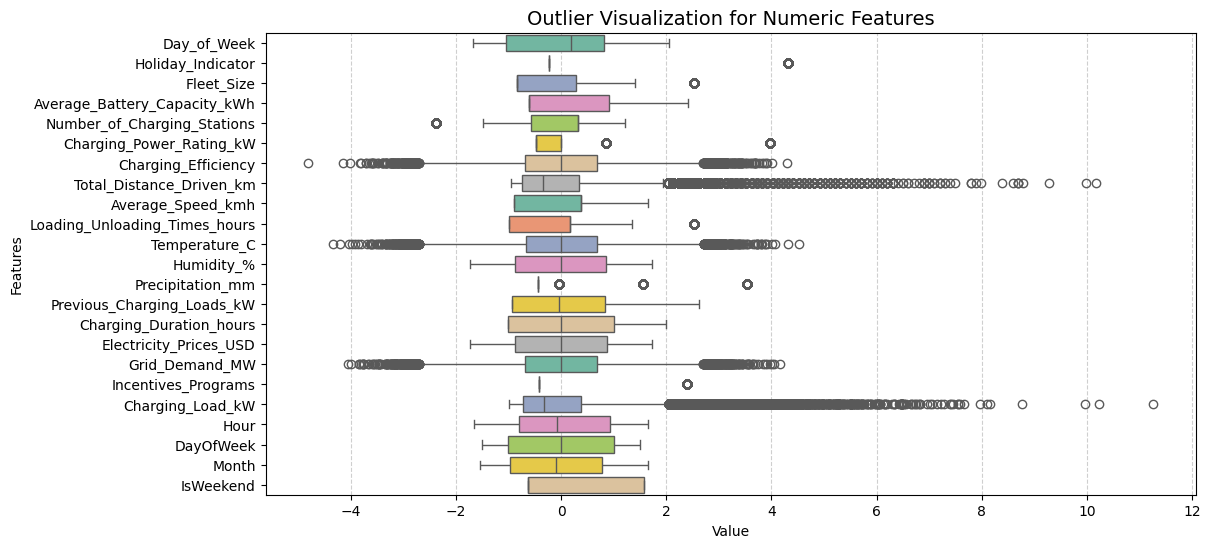

In [ ]:
# Compact outlier visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], orient="h", palette="Set2")
plt.title("Outlier Visualization for Numeric Features", fontsize=14)
plt.xlabel("Value")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Detect outliers using IQR
for col in num_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"{col}: {count} outliers")

Day_of_Week: 0 outliers
Holiday_Indicator: 3300 outliers
Fleet_Size: 3359 outliers
Average_Battery_Capacity_kWh: 0 outliers
Number_of_Charging_Stations: 3377 outliers
Charging_Power_Rating_kW: 9829 outliers
Charging_Efficiency: 459 outliers
Total_Distance_Driven_km: 3288 outliers
Average_Speed_kmh: 0 outliers
Loading_Unloading_Times_hours: 3212 outliers
Temperature_C: 453 outliers
Humidity_%: 0 outliers
Precipitation_mm: 16142 outliers
Previous_Charging_Loads_kW: 0 outliers
Charging_Duration_hours: 0 outliers
Electricity_Prices_USD: 0 outliers
Grid_Demand_MW: 411 outliers
Incentives_Programs: 9630 outliers
Charging_Load_kW: 3145 outliers
Hour: 0 outliers
DayOfWeek: 0 outliers
Month: 0 outliers
IsWeekend: 0 outliers


In [ ]:
for col in num_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound

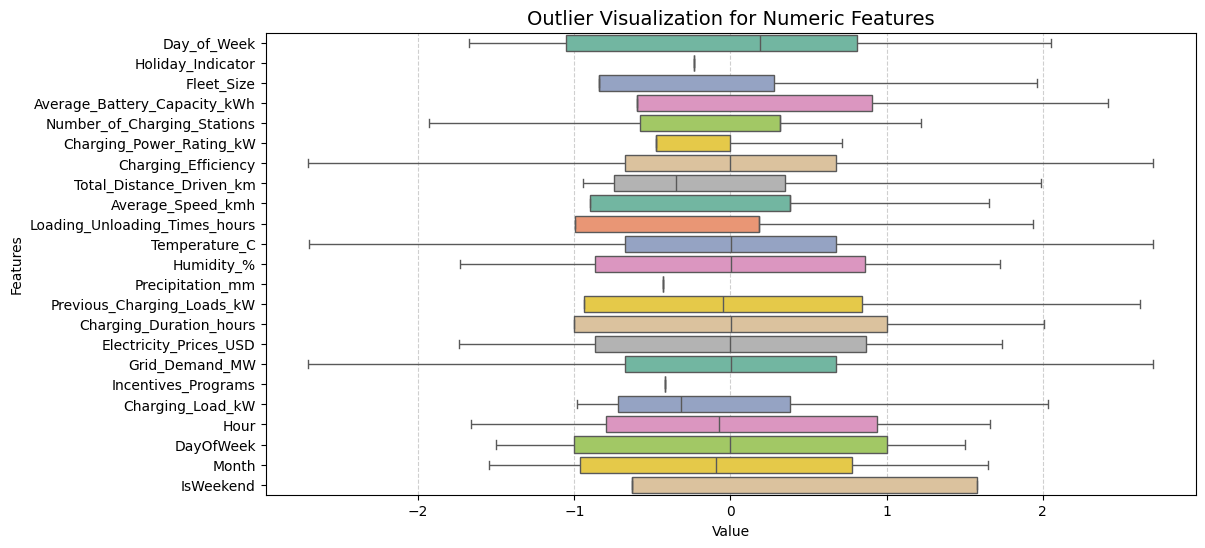

In [ ]:
# Compact outlier visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], orient="h", palette="Set2")
plt.title("Outlier Visualization for Numeric Features", fontsize=14)
plt.xlabel("Value")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=["Vehicle_Types", "Charging_Preferences", "EV_Usage_Patterns"], drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65016 entries, 0 to 65015
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      65016 non-null  object 
 1   Day_of_Week                    65016 non-null  float64
 2   Holiday_Indicator              65016 non-null  float64
 3   Fleet_Size                     65016 non-null  float64
 4   Average_Battery_Capacity_kWh   65016 non-null  float64
 5   Number_of_Charging_Stations    65016 non-null  float64
 6   Charging_Power_Rating_kW       65016 non-null  float64
 7   Charging_Efficiency            65016 non-null  float64
 8   Total_Distance_Driven_km       65016 non-null  float64
 9   Average_Speed_kmh              65016 non-null  float64
 10  Loading_Unloading_Times_hours  65016 non-null  float64
 11  Temperature_C                  65016 non-null  float64
 12  Humidity_%                     65016 non-null 

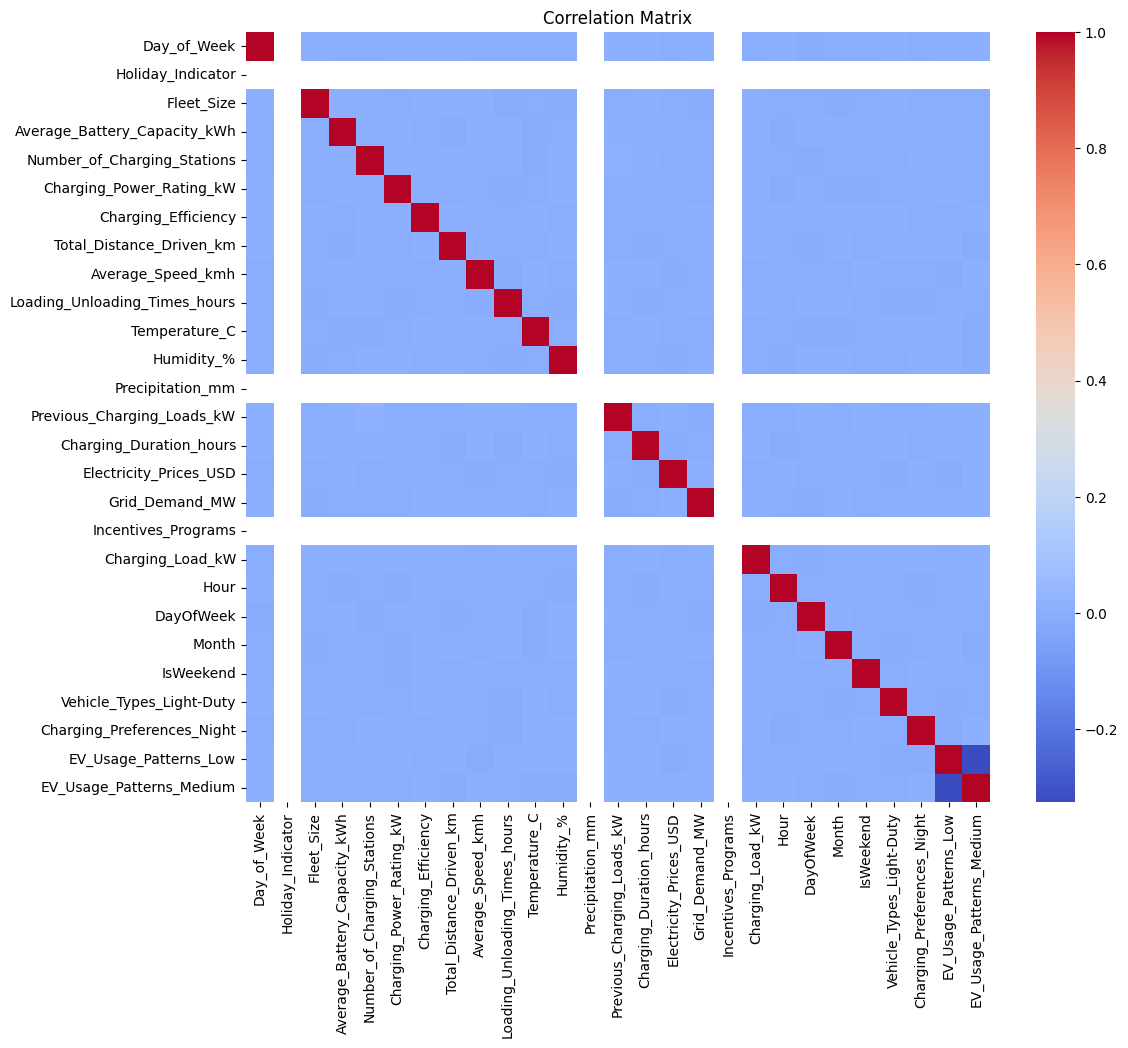

Charging_Load_kW                 1.000000
Charging_Preferences_Night       0.005263
Month                            0.004914
Vehicle_Types_Light-Duty         0.004784
Fleet_Size                       0.004511
Average_Battery_Capacity_kWh     0.003811
Number_of_Charging_Stations      0.002856
Charging_Efficiency              0.002824
EV_Usage_Patterns_Medium         0.002689
Loading_Unloading_Times_hours    0.002487
Total_Distance_Driven_km         0.002393
Charging_Duration_hours          0.002244
Charging_Power_Rating_kW         0.002143
IsWeekend                        0.001835
Grid_Demand_MW                   0.001494
EV_Usage_Patterns_Low            0.000370
Hour                             0.000146
Day_of_Week                     -0.001917
Temperature_C                   -0.002145
Humidity_%                      -0.003029
Previous_Charging_Loads_kW      -0.003460
Electricity_Prices_USD          -0.003873
Average_Speed_kmh               -0.004313
DayOfWeek                       -0

In [ ]:
# Calculate the correlation matrix
corr = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Display correlations with the target variable
print(corr['Charging_Load_kW'].sort_values(ascending=False))

count    65016.000000
mean        -0.048010
std          0.840266
min         -0.984021
25%         -0.717094
50%         -0.316705
75%          0.383976
max          2.035581
Name: Charging_Load_kW, dtype: float64


<Axes: xlabel='Charging_Load_kW', ylabel='Count'>

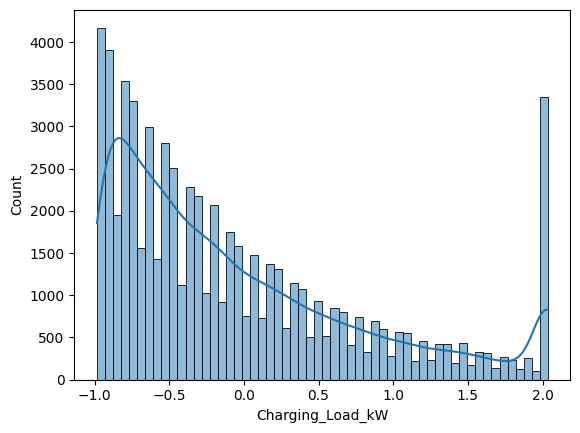

In [ ]:
print(df['Charging_Load_kW'].describe())
sns.histplot(df['Charging_Load_kW'], kde=True)

In [ ]:
# Count negative values
neg_count = (df["Charging_Load_kW"] < 0).sum()
print(f"⚠️ Negative values: {neg_count} / {len(df)}")

⚠️ Negative values: 41075 / 65016


In [ ]:
df["Charging_Load_kW"] = df["Charging_Load_kW"].clip(lower=0)

In [ ]:
df = df[df["Charging_Load_kW"] >= 0]

In [ ]:
df["Charging_Load_kW"] = np.log1p(df["Charging_Load_kW"])  # log(1 + x)

In [ ]:
corr = df.corr(numeric_only=True)
print(corr['Charging_Load_kW'].sort_values(ascending=False))

Charging_Load_kW                 1.000000
Vehicle_Types_Light-Duty         0.005609
Charging_Preferences_Night       0.005034
Month                            0.004099
Charging_Efficiency              0.004070
Fleet_Size                       0.003630
Average_Battery_Capacity_kWh     0.002964
Charging_Duration_hours          0.002903
IsWeekend                        0.002522
Number_of_Charging_Stations      0.002496
EV_Usage_Patterns_Medium         0.002167
Charging_Power_Rating_kW         0.001674
Total_Distance_Driven_km         0.000780
Hour                             0.000434
Grid_Demand_MW                   0.000357
Loading_Unloading_Times_hours    0.000246
EV_Usage_Patterns_Low           -0.000689
Temperature_C                   -0.000933
Day_of_Week                     -0.002641
Previous_Charging_Loads_kW      -0.002714
Humidity_%                      -0.002974
Average_Speed_kmh               -0.003351
Electricity_Prices_USD          -0.003942
DayOfWeek                       -0

In [ ]:
X = df.drop(columns=["Charging_Load_kW", "Timestamp", "Load_per_EV"], errors='ignore')
y = df["Charging_Load_kW"]

In [ ]:
print(df[['Holiday_Indicator', 'Precipitation_mm', 'Incentives_Programs']].isnull().sum())

Holiday_Indicator      0
Precipitation_mm       0
Incentives_Programs    0
dtype: int64


In [ ]:
df.drop(columns=["Incentives_Programs", "Holiday_Indicator", "Precipitation_mm"], inplace=True, errors="ignore")

In [ ]:
df["Load_per_EV"] = df["Charging_Load_kW"] / df["Fleet_Size"]
df["Power_per_Station"] = df["Charging_Power_Rating_kW"] / df["Number_of_Charging_Stations"]

In [ ]:
df["HourGroup"] = pd.cut(df["Hour"], bins=[0,6,12,18,24], labels=["Night", "Morning", "Afternoon", "Evening"])

In [ ]:
# Fill NaNs in numeric columns only
numeric_cols = df.select_dtypes(include=["number"]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# Make sure no NaNs in X and y
X = df.drop("Charging_Load_kW", axis=1)
y = df["Charging_Load_kW"]
X = X.select_dtypes(include=["number"])  # or after encoding all categoricals
mi = mutual_info_regression(X, y)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_scores)

Load_per_EV                      2.064321
Total_Distance_Driven_km         0.004837
Humidity_%                       0.002653
Loading_Unloading_Times_hours    0.001707
Month                            0.001700
Charging_Efficiency              0.001201
Previous_Charging_Loads_kW       0.000940
Fleet_Size                       0.000806
Average_Battery_Capacity_kWh     0.000668
Charging_Power_Rating_kW         0.000000
Number_of_Charging_Stations      0.000000
Day_of_Week                      0.000000
Average_Speed_kmh                0.000000
Charging_Duration_hours          0.000000
Temperature_C                    0.000000
Electricity_Prices_USD           0.000000
Grid_Demand_MW                   0.000000
DayOfWeek                        0.000000
Hour                             0.000000
IsWeekend                        0.000000
Power_per_Station                0.000000
dtype: float64


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract useful time components
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
df['IsPeakHour'] = df['Hour'].isin([7, 8, 17, 18, 19]).astype(int)


In [ ]:
df['Load_per_EV'] = df['Charging_Load_kW'] / df['Fleet_Size']
df['Power_per_Station'] = df['Charging_Power_Rating_kW'] / (df['Number_of_Charging_Stations'] + 1e-6)
df['Distance_per_Charge'] = df['Total_Distance_Driven_km'] / (df['Charging_Duration_hours'] + 1e-3)

In [ ]:
# Create a comfort index (example of non-linear interaction)
df['Temp_Humidity_Index'] = df['Temperature_C'] * df['Humidity_%']
df['Extreme_Weather'] = ((df['Temperature_C'] < 5) | (df['Temperature_C'] > 35)).astype(int)

In [ ]:
df['Cost_per_kWh'] = df['Electricity_Prices_USD'] / (df['Charging_Efficiency'] + 1e-6)

In [ ]:
df = df.sort_values('Timestamp')
df['Prev_Load'] = df['Charging_Load_kW'].shift(1)
df['Prev_Load_Change'] = df['Charging_Load_kW'] - df['Prev_Load']

In [ ]:
df.dropna(inplace=True)  # or impute with df.fillna()

In [ ]:
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols.tolist())

Non-numeric columns: []


In [ ]:
# STEP 1: Drop datetime and ID-like columns if not engineered
columns_to_drop = ['Timestamp']  # add others if needed
X = X.drop(columns=[col for col in columns_to_drop if col in X.columns], errors='ignore')

# STEP 2: Convert object/categorical columns using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# STEP 3: Ensure all remaining columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# STEP 4: Fill any resulting NaNs
X.fillna(X.mean(), inplace=True)

# Now X is clean → You can safely apply mutual_info_regression or any ML model
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(mi_series)


Load_per_EV                      2.063940
Hour                             0.006047
Charging_Power_Rating_kW         0.004275
Average_Battery_Capacity_kWh     0.004161
Humidity_%                       0.002818
Total_Distance_Driven_km         0.001392
Charging_Efficiency              0.001323
Day_of_Week                      0.000449
Average_Speed_kmh                0.000380
Power_per_Station                0.000198
Fleet_Size                       0.000000
Number_of_Charging_Stations      0.000000
Loading_Unloading_Times_hours    0.000000
Charging_Duration_hours          0.000000
Previous_Charging_Loads_kW       0.000000
Temperature_C                    0.000000
Electricity_Prices_USD           0.000000
DayOfWeek                        0.000000
Grid_Demand_MW                   0.000000
IsWeekend                        0.000000
Month                            0.000000
dtype: float64


In [ ]:
X = pd.get_dummies(X, drop_first=True)  # safe for most ML models

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pip install -U scikit-learn

In [ ]:
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.metrics import make_scorer, mean_squared_error, r2_score
# import numpy as np

# # Reverse the log before scoring
# def rmse(y_true, y_pred):
#     return np.sqrt(mean_squared_error(np.expm1(y_true), np.expm1(y_pred)))

# rmse_scorer = make_scorer(rmse, greater_is_better=False)

# models = {
#     "Random Forest": RandomForestRegressor(random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(random_state=42),
#     "XGBoost": XGBRegressor(random_state=42),
#     "LightGBM": LGBMRegressor(random_state=42)
# }

# cv = KFold(n_splits=5, shuffle=True, random_state=42)

# results = {}

# for name, model in models.items():
#     scores = cross_val_score(model, X, y, scoring=rmse_scorer, cv=cv)
#     r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

#     results[name] = {
#         "RMSE (mean)": -np.mean(scores),
#         "RMSE (std)": np.std(scores),
#         "R² (mean)": np.mean(r2_scores),
#         "R² (std)": np.std(r2_scores)
#     }

# # Print comparison table
# df_results = pd.DataFrame(results).T.sort_values(by="RMSE (mean)")
# display(df_results)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_log = gb_model.predict(X_test_scaled)
# Reverse log
y_pred = np.expm1(y_pred_log)
y_test_orig = np.expm1(y_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
r2 = r2_score(y_test_orig, y_pred)
print(f"✅ RMSE: {rmse:.2f}")
print(f"📈 R² Score: {r2:.4f}")

✅ RMSE: 0.01
📈 R² Score: 0.9995


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(GradientBoostingRegressor(random_state=42), X, y, scoring='r2', cv=5)
print("Cross-validated R² scores:", scores)
print("Average R²:", np.mean(scores))

Cross-validated R² scores: [0.99949333 0.99950082 0.99947593 0.99946315 0.99941226]
Average R²: 0.9994690998160511


/tmp/ipython-input-2592434950.py:8: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


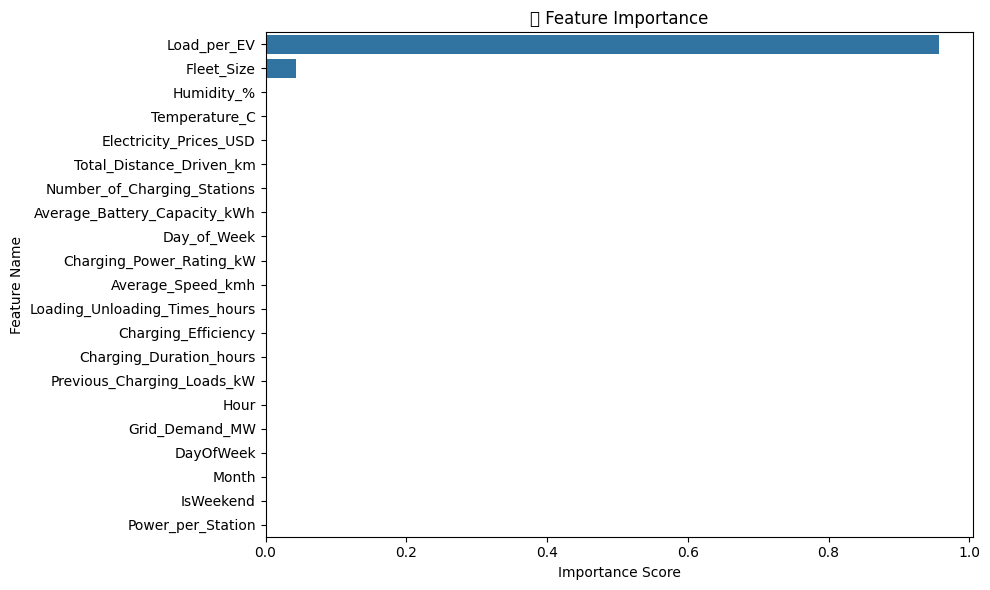

In [ ]:
feature_imp = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("🔍 Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

In [ ]:
import joblib

joblib.dump(gb_model, "ev_load_forecast_model_GB.pkl")

['ev_load_forecast_model_GB.pkl']

In [ ]:
gb_model1 = joblib.load("ev_load_forecast_model_GB.pkl")
new_pred = gb_model.predict(X_test[:10])
print("🔮 Future Prediction:", new_pred)

🔮 Future Prediction: [0.42020368 0.05371219 0.24394195 0.83835361 0.74502689 0.08111619
 0.27440067 0.2253967  0.05371219 0.05371219]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [ ]:
X_test_copy = X_test[:10].copy()
X_test_copy["Predicted_Load_kW"] = new_pred
X_test_copy.reset_index(drop=True, inplace=True)
X_test_copy

,Day_of_Week,Fleet_Size,Average_Battery_Capacity_kWh,Number_of_Charging_Stations,Charging_Power_Rating_kW,Charging_Efficiency,Total_Distance_Driven_km,Average_Speed_kmh,Loading_Unloading_Times_hours,Temperature_C,...,Charging_Duration_hours,Electricity_Prices_USD,Grid_Demand_MW,Hour,DayOfWeek,Month,IsWeekend,Load_per_EV,Power_per_Station,Predicted_Load_kW
0,1.429852,-0.843724,-0.601189,1.218947,-0.000751,0.359631,-0.248848,0.379042,0.179403,-0.755788,...,2.005384,-0.869739,1.031526,-1.661636,0.499650,-1.545175,-0.632570,-0.729834,-0.000616,0.420204
1,-0.433251,-0.843724,-0.601189,1.218947,-0.477621,0.237288,-0.844800,-0.899428,0.179403,0.692263,...,2.005384,0.771596,-0.478129,1.227872,-0.000246,-0.674153,-0.632570,-0.000000,-0.391831,0.053712
2,-0.433251,1.959549,-0.601189,1.218947,-0.000751,-0.742547,0.744405,-0.899428,1.352146,0.654394,...,0.002603,-0.982054,-1.112756,-0.216882,-1.000038,0.487210,-0.632570,0.000000,-0.000616,0.243942
3,-0.433251,-0.843724,-0.601189,1.218947,-0.477621,-1.485915,-0.348173,-0.899428,-0.993339,0.799499,...,-0.998788,-0.840524,-0.356229,1.227872,1.499443,0.196870,1.580829,-1.316073,-0.391831,0.838354
4,-1.675320,0.277585,-0.601189,1.218947,0.714554,-0.185244,0.943055,-0.899428,1.938517,0.010286,...,-0.998788,0.441228,-0.937756,-0.072407,0.499650,1.067892,-0.632570,2.923753,0.586205,0.745027
5,-1.054286,-0.843724,0.907317,0.319307,-0.000751,-1.722370,-0.149523,0.379042,-0.993339,-0.662619,...,0.002603,-0.063386,-0.808668,-0.650308,-0.500142,-0.093471,-0.632570,-0.264961,-0.002352,0.081116
6,0.187783,0.277585,-0.601189,0.319307,0.714554,-0.075527,-0.944125,1.657512,-0.993339,0.054974,...,0.002603,-1.239604,-0.839371,0.361020,-1.499935,-0.383812,1.580829,0.607791,2.237823,0.274401
7,-1.675320,-0.843724,0.907317,-1.929793,-0.477621,-2.183507,1.141706,1.657512,-0.993339,-0.333333,...,0.002603,1.013827,0.191053,1.227872,-0.500142,1.067892,-0.632570,-0.467914,0.247499,0.225397
8,-1.054286,-0.843724,-0.601189,-1.479973,-0.477621,-0.820440,-0.844800,-0.899428,1.352146,-0.867249,...,-0.998788,-0.025480,-1.306275,-0.505833,-1.000038,0.196870,-0.632570,-0.000000,0.322723,0.053712
9,-0.433251,-0.843724,-0.601189,0.319307,0.714554,0.616103,0.148453,-0.899428,0.179403,-0.637949,...,-0.998788,0.012980,-0.968270,0.216544,-0.500142,-1.545175,-0.632570,-0.000000,2.237823,0.053712


In [ ]:
#Compaire Actual vs Predicted Load
comparison_df = pd.DataFrame({
    "Actual Load (kW)": y_test[:10].values,
    "Predicted Load (kW)": new_pred
})
print(comparison_df)

   Actual Load (kW)  Predicted Load (kW)
0          0.615778             0.420204
1          0.000000             0.053712
2          0.000000             0.243942
3          1.110403             0.838354
4          0.811590             0.745027
5          0.223554             0.081116
6          0.168714             0.274401
7          0.394790             0.225397
8          0.000000             0.053712
9          0.000000             0.053712


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


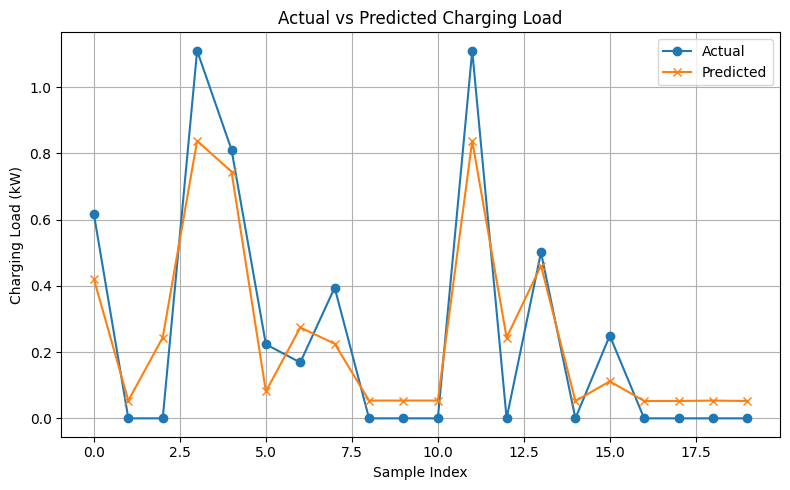

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_test[:20].values, label='Actual', marker='o')
plt.plot(gb_model.predict(X_test[:20]), label='Predicted', marker='x')
plt.title("Actual vs Predicted Charging Load")
plt.xlabel("Sample Index")
plt.ylabel("Charging Load (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def prepare_future_features(last_timestamp, hours=24, static_features=None):
    """
    Prepare a dataframe with 21 features needed for prediction.
    static_features: dict containing static or constant feature values for features that
                     cannot be derived from timestamp.
    """
    # Create future timestamps
    future_hours = pd.date_range(start=last_timestamp + pd.Timedelta(hours=1), periods=hours, freq='H')
    df = pd.DataFrame({'Timestamp': future_hours})

    # Time-based features
    df['Day_of_Week'] = df['Timestamp'].dt.dayofweek
    df['Hour'] = df['Timestamp'].dt.hour
    df['DayOfWeek'] = df['Timestamp'].dt.dayofweek  # duplicated but model expects both
    df['Month'] = df['Timestamp'].dt.month
    df['IsWeekend'] = df['Day_of_Week'].isin([5,6]).astype(int)

    # Fill static or constant features
    # If static_features not provided, use placeholders or zeros (replace as needed)
    defaults = {
        'Fleet_Size': 100,
        'Average_Battery_Capacity_kWh': 40,
        'Number_of_Charging_Stations': 10,
        'Charging_Power_Rating_kW': 7.4,
        'Charging_Efficiency': 0.9,
        'Total_Distance_Driven_km': 50,
        'Average_Speed_kmh': 40,
        'Loading_Unloading_Times_hours': 1,
        'Temperature_C': 25,
        'Humidity_%': 60,
        'Previous_Charging_Loads_kW': 5,
        'Charging_Duration_hours': 1,
        'Electricity_Prices_USD': 0.12,
        'Grid_Demand_MW': 500,
        'Load_per_EV': 5,
        'Power_per_Station': 3
    }
    if static_features is not None:
        defaults.update(static_features)

    # Assign static features to the dataframe
    for feat, val in defaults.items():
        df[feat] = val

    # Order columns exactly as model expects:
    feature_cols = ['Day_of_Week', 'Fleet_Size', 'Average_Battery_Capacity_kWh', 'Number_of_Charging_Stations',
                    'Charging_Power_Rating_kW', 'Charging_Efficiency', 'Total_Distance_Driven_km', 'Average_Speed_kmh',
                    'Loading_Unloading_Times_hours', 'Temperature_C', 'Humidity_%', 'Previous_Charging_Loads_kW',
                    'Charging_Duration_hours', 'Electricity_Prices_USD', 'Grid_Demand_MW', 'Hour', 'DayOfWeek',
                    'Month', 'IsWeekend', 'Load_per_EV', 'Power_per_Station']

    return df[feature_cols + ['Timestamp']]  # keep Timestamp at the end for reference

# Example usage:
last_timestamp = pd.Timestamp('2025-08-09 12:00:00')

# Optional: provide any updated static features you want to override
static_values = {
    'Fleet_Size': 120,
    'Temperature_C': 30,
    'Grid_Demand_MW': 550
}

future_df = prepare_future_features(last_timestamp, hours=24, static_features=static_values)

print(future_df.head())

   Day_of_Week  Fleet_Size  Average_Battery_Capacity_kWh  \
0            5         120                            40   
1            5         120                            40   
2            5         120                            40   
3            5         120                            40   
4            5         120                            40   

   Number_of_Charging_Stations  Charging_Power_Rating_kW  Charging_Efficiency  \
0                           10                       7.4                  0.9   
1                           10                       7.4                  0.9   
2                           10                       7.4                  0.9   
3                           10                       7.4                  0.9   
4                           10                       7.4                  0.9   

   Total_Distance_Driven_km  Average_Speed_kmh  Loading_Unloading_Times_hours  \
0                        50                 40                         

/tmp/ipython-input-1000485064.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_hours = pd.date_range(start=last_timestamp + pd.Timedelta(hours=1), periods=hours, freq='H')


In [ ]:
import joblib

model = joblib.load('/content/ev_load_forecast_model_GB.pkl')  # load your trained model

X_future = future_df.drop(columns=['Timestamp'])  # only features

future_df['Predicted_Load_kW'] = model.predict(X_future)

print(future_df[['Timestamp', 'Predicted_Load_kW']])

             Timestamp  Predicted_Load_kW
0  2025-08-09 13:00:00           1.710302
1  2025-08-09 14:00:00           1.710302
2  2025-08-09 15:00:00           1.710302
3  2025-08-09 16:00:00           1.710302
4  2025-08-09 17:00:00           1.710302
5  2025-08-09 18:00:00           1.710302
6  2025-08-09 19:00:00           1.710302
7  2025-08-09 20:00:00           1.710302
8  2025-08-09 21:00:00           1.710302
9  2025-08-09 22:00:00           1.710302
10 2025-08-09 23:00:00           1.710302
11 2025-08-10 00:00:00           1.710302
12 2025-08-10 01:00:00           1.710302
13 2025-08-10 02:00:00           1.710302
14 2025-08-10 03:00:00           1.710302
15 2025-08-10 04:00:00           1.710302
16 2025-08-10 05:00:00           1.710302
17 2025-08-10 06:00:00           1.710302
18 2025-08-10 07:00:00           1.710302
19 2025-08-10 08:00:00           1.710302
20 2025-08-10 09:00:00           1.710302
21 2025-08-10 10:00:00           1.710302
22 2025-08-10 11:00:00           1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [ ]:
start_hour = int(input("Start hour (0-23): "))
end_hour = int(input("End hour (0-23): "))

filtered = future_df[(future_df['Hour'] >= start_hour) & (future_df['Hour'] <= end_hour)]
recommended = filtered.nsmallest(3, 'Predicted_Load_kW')

print(f"Best charging times between {start_hour}:00 and {end_hour}:00:")
for _, row in recommended.iterrows():
    print(f"{row['Timestamp']} with predicted load {row['Predicted_Load_kW']:.2f} kW")

Start hour (0-23): 13
End hour (0-23): 18
Best charging times between 13:00 and 18:00:
2025-08-09 13:00:00 with predicted load 1.71 kW
2025-08-09 14:00:00 with predicted load 1.71 kW
2025-08-09 15:00:00 with predicted load 1.71 kW


In [ ]:
joblib.dump(gb_model, "ev_load_forecast_and_recommendation.pkl")

['ev_load_forecast_and_recommendation.pkl']